In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

top100 = pd.read_csv('top100videogamesales.csv')

top100.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## 1. Chart showing the sales by region for each publisher

### In North America, Microsoft Game Studios has the most sales

### In Japan and the EU, Nintendo has the most sales

<Axes: xlabel='NA_Sales', ylabel='Publisher'>

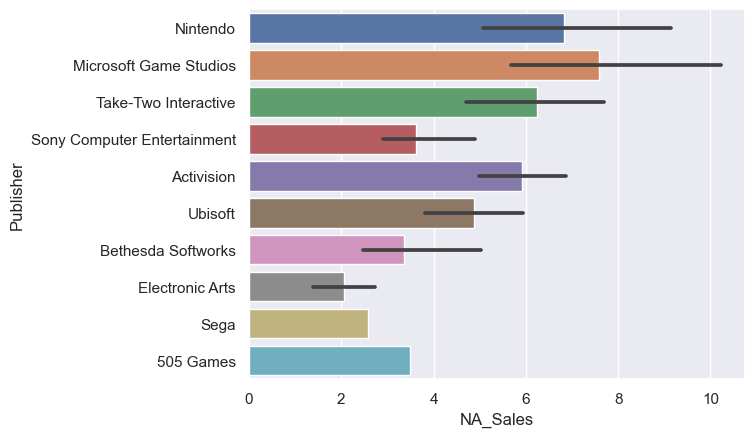

In [20]:
sns.barplot(data=top100, x='NA_Sales',y='Publisher')


<Axes: xlabel='JP_Sales', ylabel='Publisher'>

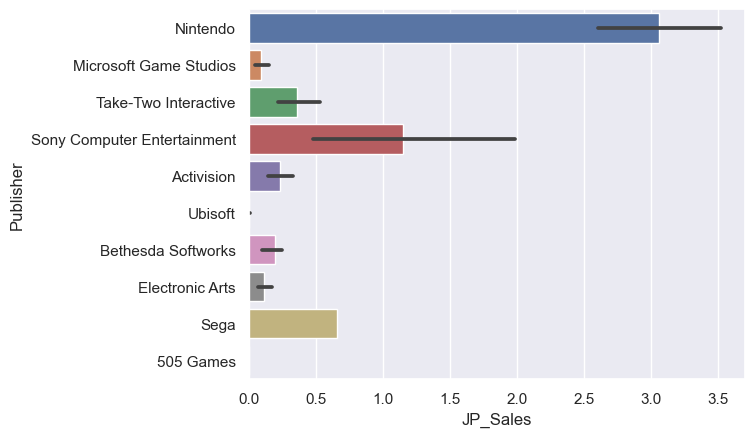

In [21]:
sns.barplot(data=top100, x='JP_Sales',y='Publisher')

<Axes: xlabel='EU_Sales', ylabel='Publisher'>

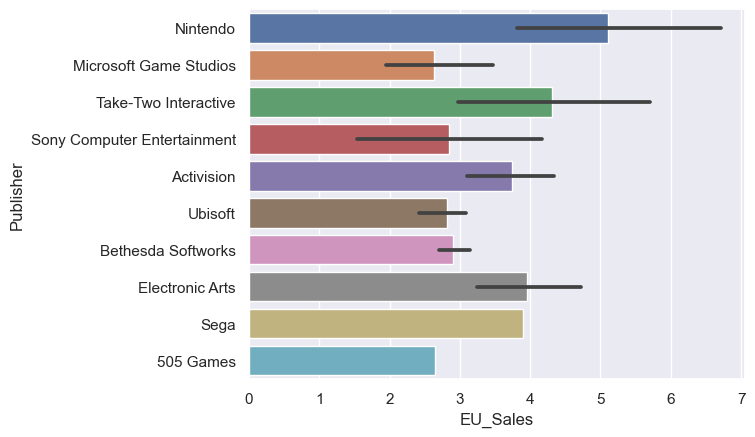

In [22]:
sns.barplot(data=top100, x='EU_Sales',y='Publisher')

## 2. A line chart showing the total global sales each year

#### As shown in the graph below, sales were at its lowest in 2003 and 2014.There is a significant increase  in 2005 and 2006. However, sales decreased drastically shortly after towards the end of 2006.


<Axes: xlabel='Year', ylabel='Global_Sales'>

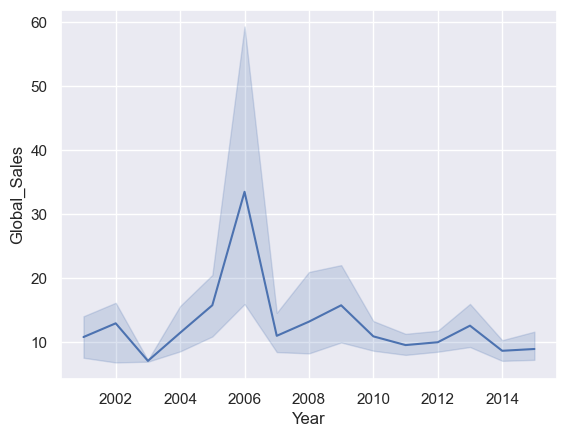

In [26]:
sns.lineplot(data=top100,x='Year',y='Global_Sales')

## 3.  A Histogram showing the global sales distribution for games with Action as the genre.

#### Global Sales were distributed between 7 and 12 dollars.
#### There are 6 observations between 7 - 9 dollars and 4 observations between 9 and 12 dollars.

In [113]:
actionGenre=top100.loc[top100['Genre']== 'Action' ]
actionGenre.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11,12,Grand Theft Auto V,PlayStation,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
12,13,Grand Theft Auto: San Andreas,PlayStation,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


<Axes: xlabel='Global_Sales', ylabel='Count'>

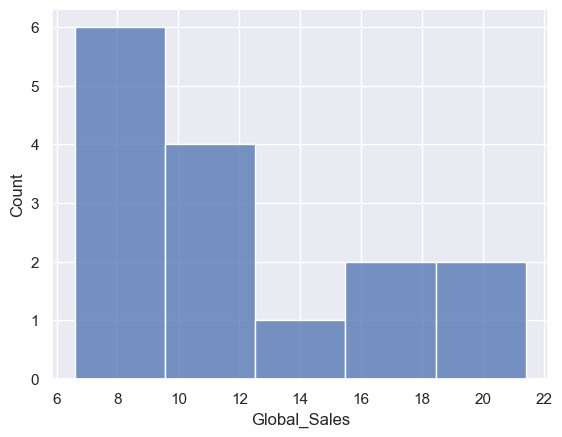

In [110]:
sns.histplot(data=actionGenre,x='Global_Sales',bins=5)

## 4. The percentage of North American Sales by genre



In [91]:

NorthAmerica= top100.loc[:,['Genre','NA_Sales']]

NorthAmerica.head()

,Genre,NA_Sales
0,Sports,41.49
1,Racing,15.85
2,Sports,15.75
3,Platform,11.38
4,Misc,14.03


In [75]:
group_by_genre=NorthAmerica.groupby('Genre')
Total=group_by_genre.sum()
Total.head(10)



,NA_Sales
Genre,
Action,77.81
Fighting,14.40
Misc,70.60
Platform,52.67
Puzzle,3.44
Racing,56.45
Role-Playing,50.48
Shooter,140.44
Simulation,14.61


In [24]:
total_sales = NorthAmerica['NA_Sales'].sum()
total_sales

565.7699999999999

In [86]:
Percentage= Total/total_sales * 100
Percentage.head(10)
Percentage.sort_values(by=['NA_Sales'], ascending=False)

,NA_Sales
Genre,
Shooter,24.822808
Sports,15.000795
Action,13.752938
Misc,12.478569
Racing,9.977553
Platform,9.309437
Role-Playing,8.922354
Simulation,2.582321
Fighting,2.545204


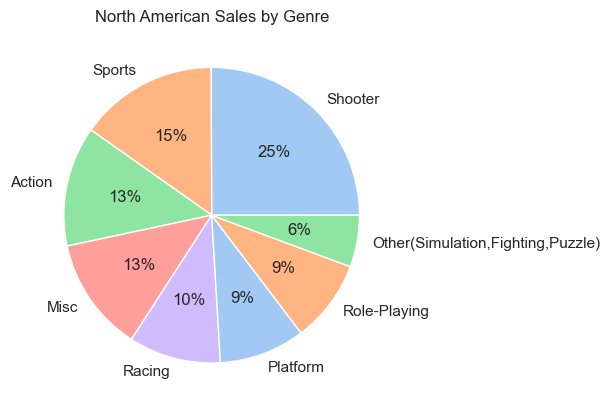

In [114]:
data = [24.82, 15, 13, 12.4, 9.97,9.30,8.92,5.6]
labels = ['Shooter', 'Sports', 'Action', 'Misc', 'Racing','Platform','Role-Playing','Other(Simulation,Fighting,Puzzle)']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("North American Sales by Genre")
plt.show()

## 5. The Percentage of European Sales by Genre

In [92]:
Europe= top100.loc[:,['Genre','EU_Sales']]

Europe.head()

,Genre,EU_Sales
0,Sports,29.02
1,Racing,12.88
2,Sports,11.01
3,Platform,9.23
4,Misc,9.20


In [96]:
group_by_genreEU=Europe.groupby('Genre')
TotalEU=group_by_genreEU.sum()
TotalEU.head(10)

,EU_Sales
Genre,
Action,58.15
Fighting,5.00
Misc,48.00
Platform,33.12
Puzzle,5.36
Racing,44.03
Role-Playing,36.20
Shooter,81.63
Simulation,23.26


In [95]:
total_salesEU =Europe['EU_Sales'].sum()
total_salesEU

416.93

In [98]:
PercentageEU= TotalEU/total_salesEU * 100
PercentageEU.head(10)
PercentageEU.sort_values(by=['EU_Sales'], ascending=False)

,EU_Sales
Genre,
Sports,19.710743
Shooter,19.578826
Action,13.947185
Misc,11.512724
Racing,10.560526
Role-Playing,8.682513
Platform,7.943780
Simulation,5.578874
Puzzle,1.285588


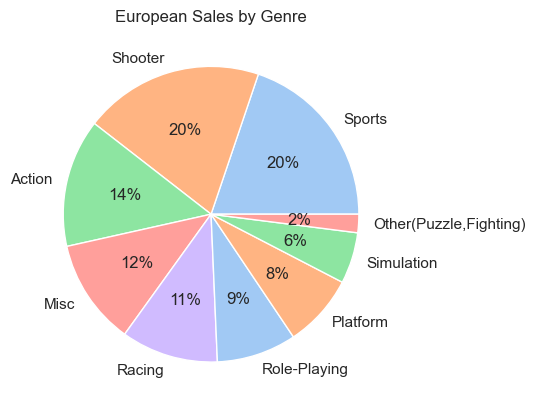

In [115]:
data = [19.71,19.57, 13.94, 11.51, 10.56,8.68,7.94,5.57,2]
labels = ['Sports', 'Shooter', 'Action', 'Misc', 'Racing','Role-Playing','Platform','Simulation','Other(Puzzle,Fighting)']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("European Sales by Genre")
plt.show()

# 6. Similarities and differences between North American and European Sales.

##### Sales in both regions are similar in most of the game categories.There is a  1% difference in most cases when comparing North America and European Sales.
##### The biggest difference we see however, is in the shooter game category.Shooter game sales  are 5% higher in North America than in Europe.Sales in the sports category is also 5% lower in North America compared to European Sales.Simulation game sales are also relatively higher in Europe than in North America.

# 7. Count of Games by Platform

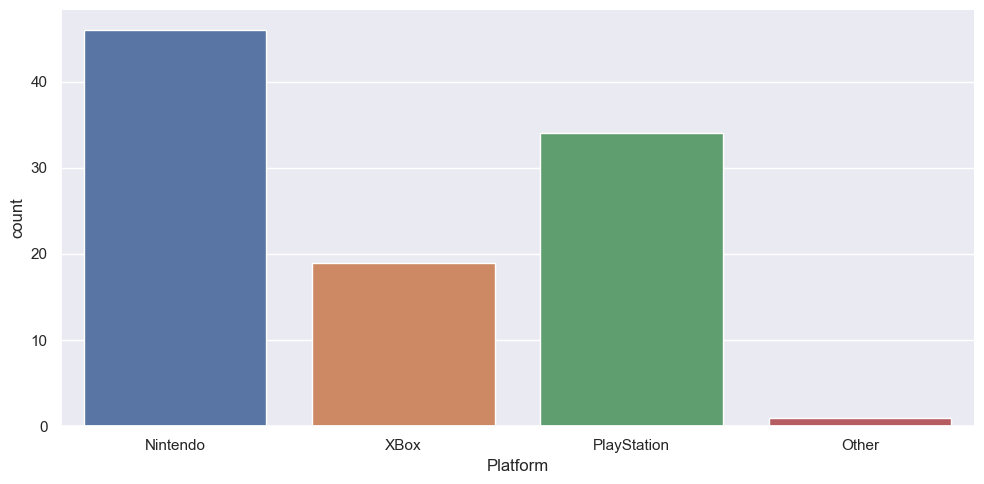

In [106]:
sns.catplot(kind='count', data=top100, x='Platform', aspect=2)

#### In the chart above, we see Nintendo created roughly 46 games, Xbox created roughly 18 games,Playstation created 34 games and Other created less than 5 games.